<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/analysis/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will make some graphs about the time series of some relevant metrics like % completely stay at home devices and % part time job behaviors and we will see how things change before and after the covid era

# 0. load data

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/My\ Drive/COVID\ 19\ data\ analysis

/content/drive/My Drive/COVID 19 data analysis


In [ ]:
ls

 aggreagate_data_on_county.ipynb
 agg_social_dist
 analysis_and_graphs.ipynb
 compare_30_days_before_and_after.ipynb
'Copy of COVID-19 US state policy database.csv'
 days_since.csv
 graphs.ipynb
 merge_mobility_with_first_case_and_shelter_in_place.ipynb
 small_data.csv
 social_dist_all_trimmed.csv
'Social Distancing Index Exploration.ipynb'
 social_dist_with_dates
 social_dist_with_days_since


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("agg_social_dist")

In [ ]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home
0,0,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,22780.000000
1,1,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Washington County,23029,-93.0,-91.0,0.0,156,68,5,24,0.0,280.461538,NaN,NaN,89197.250000
2,2,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Adjuntas Municipio,72001,-75.0,-74.0,0.0,241,115,14,19,0.0,890.377593,NaN,NaN,140597.925311
3,3,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguada Municipio,72003,-75.0,-74.0,0.0,697,327,40,59,0.0,775.674319,NaN,NaN,60138.741750
4,4,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguadilla Municipio,72005,-75.0,-74.0,0.0,1103,518,55,98,0.0,740.937443,NaN,NaN,8579.466002


In [ ]:
data['home_device_percentage'] = data['completely_home_device_count'] / data['device_count'] 

In [ ]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage
0,0,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,22780.000000,0.357143
1,1,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Washington County,23029,-93.0,-91.0,0.0,156,68,5,24,0.0,280.461538,NaN,NaN,89197.250000,0.435897
2,2,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Adjuntas Municipio,72001,-75.0,-74.0,0.0,241,115,14,19,0.0,890.377593,NaN,NaN,140597.925311,0.477178
3,3,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguada Municipio,72003,-75.0,-74.0,0.0,697,327,40,59,0.0,775.674319,NaN,NaN,60138.741750,0.469154
4,4,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguadilla Municipio,72005,-75.0,-74.0,0.0,1103,518,55,98,0.0,740.937443,NaN,NaN,8579.466002,0.469628


# 1. make a line plot about completely home device percentage across the US (average on all states combined) as a function of date

In [ ]:
data = data[['date_range_start', 'home_device_percentage']]

In [ ]:
data.head()

,date_range_start,home_device_percentage
0,2020-01-01T00:00:00-04:00,0.357143
1,2020-01-01T00:00:00-04:00,0.435897
2,2020-01-01T00:00:00-04:00,0.477178
3,2020-01-01T00:00:00-04:00,0.469154
4,2020-01-01T00:00:00-04:00,0.469628


In [ ]:
from datetime import datetime
data['start_date'] = data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [ ]:
data.head()

,date_range_start,home_device_percentage,start_date
0,2020-01-01T00:00:00-04:00,0.357143,2020-01-01
1,2020-01-01T00:00:00-04:00,0.435897,2020-01-01
2,2020-01-01T00:00:00-04:00,0.477178,2020-01-01
3,2020-01-01T00:00:00-04:00,0.469154,2020-01-01
4,2020-01-01T00:00:00-04:00,0.469628,2020-01-01


In [ ]:
data.drop(['date_range_start'], inplace=True, axis= 1)

In [ ]:
data.head()

,home_device_percentage,start_date
0,0.357143,2020-01-01
1,0.435897,2020-01-01
2,0.477178,2020-01-01
3,0.469154,2020-01-01
4,0.469628,2020-01-01


In [ ]:
data = data.groupby(['start_date']).mean()

In [ ]:
data = data.reset_index()

In [ ]:
data

,start_date,home_device_percentage
0,2020-01-01,0.340396
1,2020-01-02,0.255287
2,2020-01-03,0.232440
3,2020-01-04,0.268836
4,2020-01-05,0.310263
...,...,...
122,2020-05-02,0.322380
123,2020-05-03,0.380181
124,2020-05-04,0.339213
125,2020-05-05,0.336394


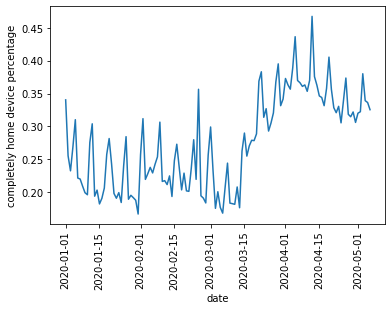

In [ ]:
plt.plot(data['start_date'],data['home_device_percentage'])
plt.xticks(rotation='vertical')
plt.xlabel("date")
plt.ylabel("completely home device percentage")
plt.show()

Seems like a trend of staying home more at a national level starts roughly from
2020-04-01. 

# 2. Now let's explore other percentage of other behaviors as a function of time on a national level

In [ ]:
data = pd.read_csv("agg_social_dist")

In [ ]:
from datetime import datetime
data['start_date'] = data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [ ]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,start_date
0,0,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,22780.000000,2020-01-01
1,1,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Washington County,23029,-93.0,-91.0,0.0,156,68,5,24,0.0,280.461538,NaN,NaN,89197.250000,2020-01-01
2,2,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Adjuntas Municipio,72001,-75.0,-74.0,0.0,241,115,14,19,0.0,890.377593,NaN,NaN,140597.925311,2020-01-01
3,3,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguada Municipio,72003,-75.0,-74.0,0.0,697,327,40,59,0.0,775.674319,NaN,NaN,60138.741750,2020-01-01
4,4,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguadilla Municipio,72005,-75.0,-74.0,0.0,1103,518,55,98,0.0,740.937443,NaN,NaN,8579.466002,2020-01-01


In [ ]:
data['part_time_work_device_percentage'] = data['part_time_work_behavior_devices'] / data['device_count']
data['full_time_work_device_percentage'] = data['full_time_work_behavior_devices'] / data['device_count']
data['delivery_device_percentage'] = data['delivery_behavior_devices'] / data['device_count']

In [ ]:
data = data[['start_date','part_time_work_device_percentage', 'full_time_work_device_percentage'\
            , 'delivery_device_percentage']]

In [ ]:
data.head()

,start_date,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
0,2020-01-01,0.089286,0.125000,0.0
1,2020-01-01,0.032051,0.153846,0.0
2,2020-01-01,0.058091,0.078838,0.0
3,2020-01-01,0.057389,0.084648,0.0
4,2020-01-01,0.049864,0.088849,0.0


In [ ]:
data = data.groupby(['start_date']).mean().reset_index()

In [ ]:
data

,start_date,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
0,2020-01-01,0.051420,0.122467,0.000000
1,2020-01-02,0.101020,0.177067,0.000000
2,2020-01-03,0.102882,0.178500,0.000000
3,2020-01-04,0.071086,0.145477,0.000000
4,2020-01-05,0.062615,0.121344,0.000000
...,...,...,...,...
122,2020-05-02,0.048744,0.021642,0.030735
123,2020-05-03,0.039475,0.020570,0.024403
124,2020-05-04,0.072043,0.039230,0.028803
125,2020-05-05,0.070616,0.039342,0.027395


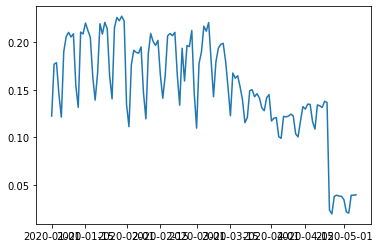

In [ ]:
plt.plot(data['start_date'],data['full_time_work_device_percentage'])

Text(0, 0.5, 'delivery device percentage')

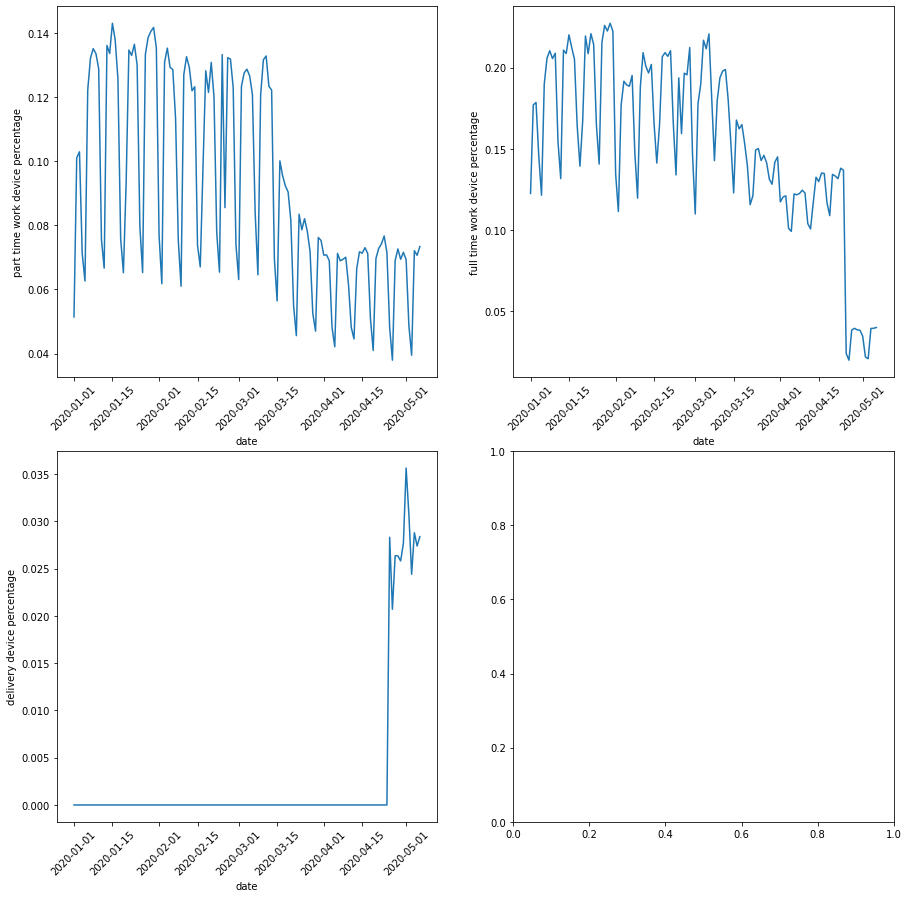

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
axs[0, 0].plot(data['start_date'],data['part_time_work_device_percentage'])
# don't know why subplot works differnt form plt..
for tick in axs[0,0].xaxis.get_majorticklabels(): 
    tick.set_rotation(45)
axs[0, 0].set_xlabel("date")
axs[0, 0].set_ylabel("part time work device percentage")

axs[0, 1].plot(data['start_date'],data['full_time_work_device_percentage'])
for tick in axs[0,1].xaxis.get_majorticklabels(): 
    tick.set_rotation(45)
axs[0, 1].set_xlabel("date")
axs[0, 1].set_ylabel("full time work device percentage")

axs[1, 0].plot(data['start_date'],data['delivery_device_percentage'])
for tick in axs[1,0].xaxis.get_majorticklabels(): 
    tick.set_rotation(45)
axs[1, 0].set_xlabel("date")
axs[1, 0].set_ylabel("delivery device percentage")

as we can see, full time work behavior devices percentage drops dramatically after around 2020-4-15, while part time behavior is not impacted that dramtically. Delivery devices increases dramatically after 4-15 as well

Now let's look at time series of median home dwell time and distance traveled need to apply the weighted average function when aggregate.

In [ ]:
data = pd.read_csv("agg_social_dist")

In [ ]:
data['date'] = data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [ ]:
data = data[['date', 'device_count', 'median_home_dwell_time', 'distance_traveled_from_home']]

In [ ]:
data.head()

,date,device_count,median_home_dwell_time,distance_traveled_from_home
0,2020-01-01,56,477.000000,22780.000000
1,2020-01-01,156,280.461538,89197.250000
2,2020-01-01,241,890.377593,140597.925311
3,2020-01-01,697,775.674319,60138.741750
4,2020-01-01,1103,740.937443,8579.466002


In [ ]:
data[['median_home_dwell_time','distance_traveled_from_home']].isnull().sum()

median_home_dwell_time           0
distance_traveled_from_home    727
dtype: int64

need to delete the instances where distance is null, to aid future computations of weighted averages.

In [ ]:
data.dropna(subset=['distance_traveled_from_home'],inplace=True)

In [ ]:
data[['median_home_dwell_time','distance_traveled_from_home']].isnull().sum()

median_home_dwell_time         0
distance_traveled_from_home    0
dtype: int64

In [ ]:
wm = lambda x: np.average(x, weights= data.loc[x.index, "device_count"])

In [ ]:
data = data.groupby(['date']).agg(home_dwell_time = ('median_home_dwell_time', wm), \
                                  distance_traveled = ('distance_traveled_from_home', wm))

In [ ]:
data = data.reset_index()

In [ ]:
data

,date,home_dwell_time,distance_traveled
0,2020-01-01,734.348123,12807.230138
1,2020-01-02,703.003008,11744.265702
2,2020-01-03,728.750692,11639.587306
3,2020-01-04,764.477318,11383.213754
4,2020-01-05,720.879700,9765.923198
...,...,...,...
122,2020-05-02,832.390213,7054.213805
123,2020-05-03,942.354045,6442.352888
124,2020-05-04,816.071705,7383.383093
125,2020-05-05,808.948705,7462.279207


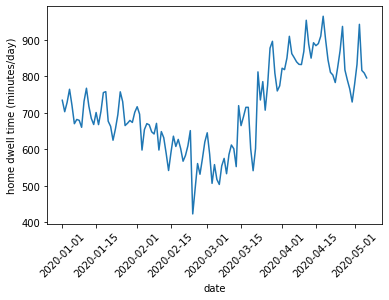

In [ ]:
plt.plot(data['date'],data['home_dwell_time'])
plt.xticks(rotation= 45)
plt.xlabel("date")
plt.ylabel("home dwell time (minutes/day)")
plt.show()

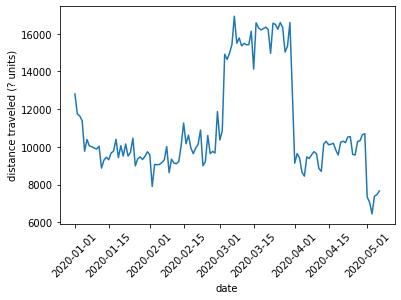

In [ ]:
plt.plot(data['date'],data['distance_traveled'])
plt.xticks(rotation= 45)
plt.xlabel("date")
plt.ylabel("distance traveled (? units)")
plt.show()

# 3. Now let's analyze data on each state.

In [ ]:
data = pd.read_csv("agg_social_dist")

In [ ]:
data['home_device_percentage'] = data['completely_home_device_count'] / data['device_count']

In [ ]:
data['part_time_work_device_percentage'] = data['part_time_work_behavior_devices'] / data['device_count']
data['full_time_work_device_percentage'] = data['full_time_work_behavior_devices'] / data['device_count']
data['delivery_device_percentage'] = data['delivery_behavior_devices'] / data['device_count']

In [ ]:
data['start_date'] = data['date_range_start'].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [ ]:
data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,start_date,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
0,0,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Aroostook County,23003,-93.0,-91.0,0.0,56,20,5,7,0.0,477.000000,NaN,NaN,22780.000000,0.357143,2020-01-01,0.089286,0.125000,0.0
1,1,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,23.0,ME,Washington County,23029,-93.0,-91.0,0.0,156,68,5,24,0.0,280.461538,NaN,NaN,89197.250000,0.435897,2020-01-01,0.032051,0.153846,0.0
2,2,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Adjuntas Municipio,72001,-75.0,-74.0,0.0,241,115,14,19,0.0,890.377593,NaN,NaN,140597.925311,0.477178,2020-01-01,0.058091,0.078838,0.0
3,3,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguada Municipio,72003,-75.0,-74.0,0.0,697,327,40,59,0.0,775.674319,NaN,NaN,60138.741750,0.469154,2020-01-01,0.057389,0.084648,0.0
4,4,2020-01-01T00:00:00-04:00,2020-01-02T00:00:00-04:00,72.0,PR,Aguadilla Municipio,72005,-75.0,-74.0,0.0,1103,518,55,98,0.0,740.937443,NaN,NaN,8579.466002,0.469628,2020-01-01,0.049864,0.088849,0.0


In [ ]:
data = data[['start_date','state_code','home_device_percentage', 'part_time_work_device_percentage',\
             'full_time_work_device_percentage', 'delivery_device_percentage']]

In [ ]:
data.head()

,start_date,state_code,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
0,2020-01-01,ME,0.357143,0.089286,0.125000,0.0
1,2020-01-01,ME,0.435897,0.032051,0.153846,0.0
2,2020-01-01,PR,0.477178,0.058091,0.078838,0.0
3,2020-01-01,PR,0.469154,0.057389,0.084648,0.0
4,2020-01-01,PR,0.469628,0.049864,0.088849,0.0


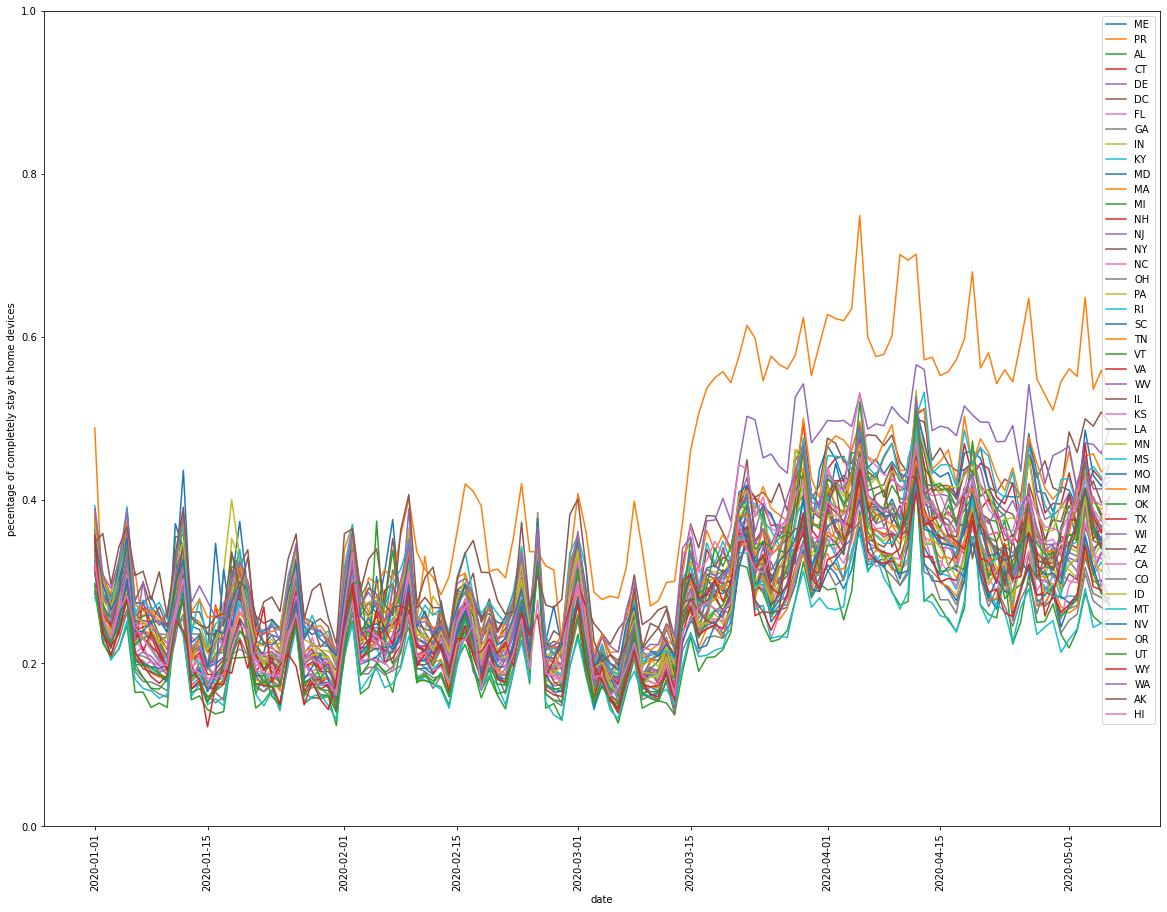

<Figure size 1440x1080 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 15))

# percentage at home
for i, state in enumerate(data['state_code'].unique()):
    plt_df = data[data['state_code']==state]
    plt_df = plt_df.groupby(['start_date']).mean().reset_index()
    plt_df = plt_df.sort_values(by=['start_date'])
    plt.plot(plt_df['start_date'], plt_df['home_device_percentage'])
    plt.ylim(0, 1)
    plt.xticks(rotation='vertical')
    plt.legend([st])
    
plt.legend(data['state_code'].unique())
plt.xlabel("date")
plt.ylabel("pecentage of completely stay at home devices")

plt.figure(figsize=(20, 15))
plt.show()

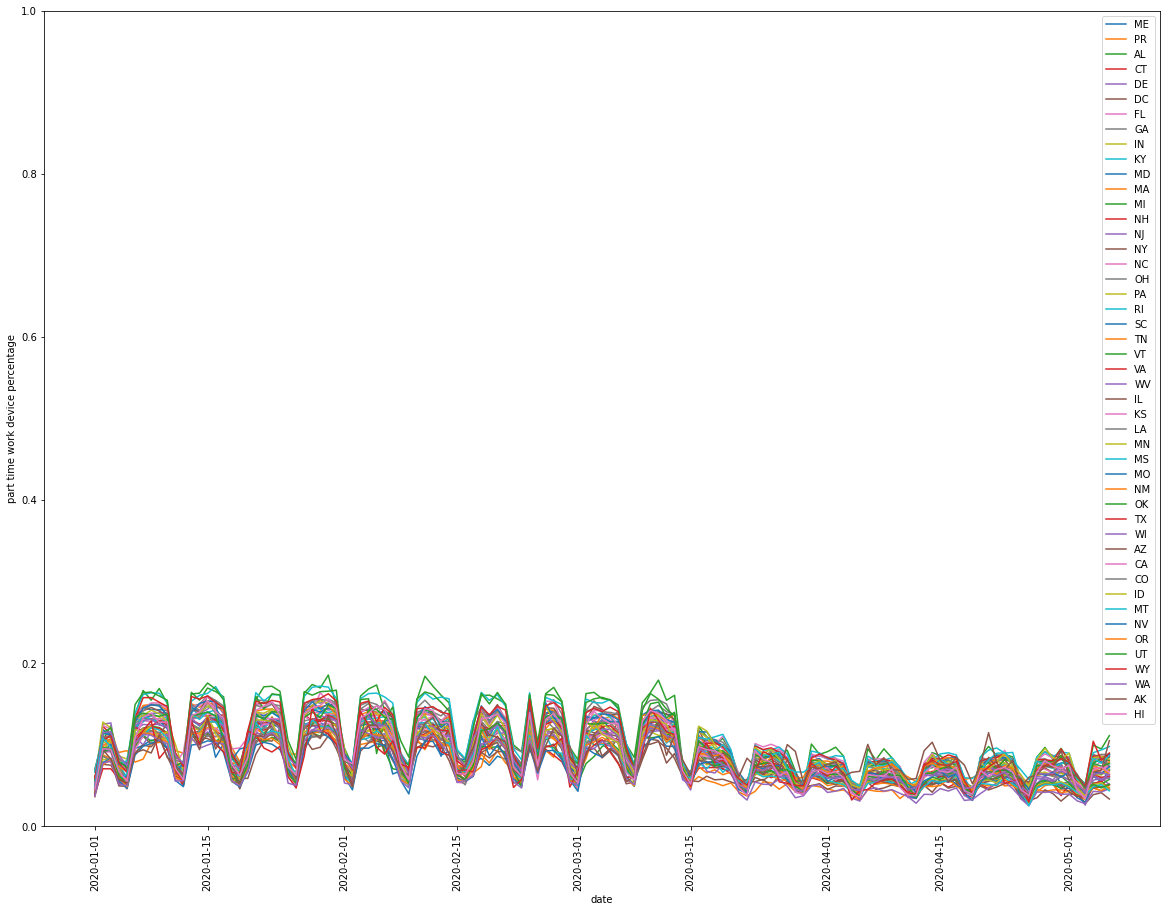

In [ ]:
plt.figure(figsize=(20, 15))
# part time percentage
for i, state in enumerate(data['state_code'].unique()):
    plt_df = data[data['state_code']==state]
    plt_df = plt_df.groupby(['start_date']).mean().reset_index()
    plt_df = plt_df.sort_values(by=['start_date'])
    plt.plot(plt_df['start_date'], plt_df['part_time_work_device_percentage'])
    plt.ylim(0, 1)
    plt.xticks(rotation='vertical')
    plt.legend([st])
    
plt.legend(data['state_code'].unique())
plt.xlabel("date")
plt.ylabel("part time work device percentage")
plt.show()

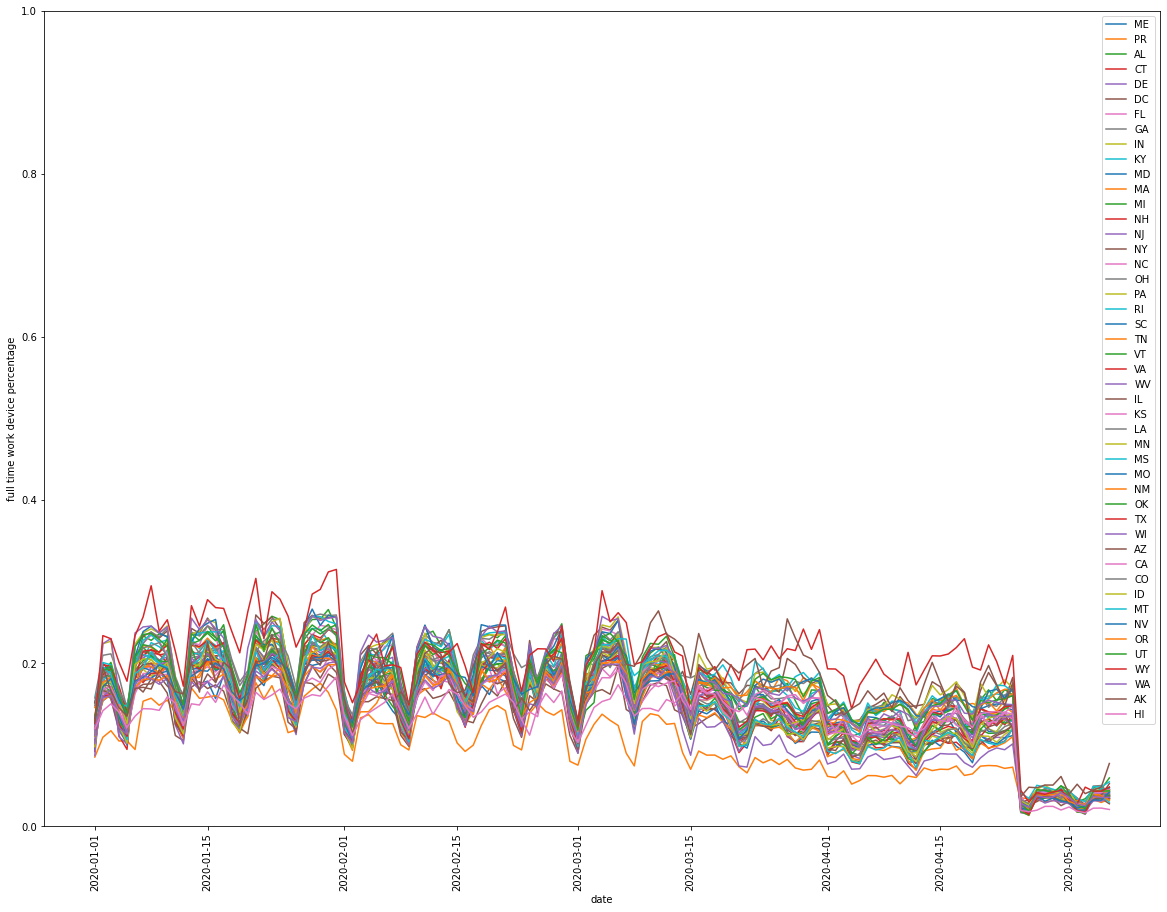

In [ ]:
plt.figure(figsize=(20, 15))
# full time percentage
for i, state in enumerate(data['state_code'].unique()):
    plt_df = data[data['state_code']==state]
    plt_df = plt_df.groupby(['start_date']).mean().reset_index()
    plt_df = plt_df.sort_values(by=['start_date'])
    plt.plot(plt_df['start_date'], plt_df['full_time_work_device_percentage'])
    plt.ylim(0, 1)
    plt.xticks(rotation='vertical')
    plt.legend([st])
    
plt.legend(data['state_code'].unique())
plt.xlabel("date")
plt.ylabel("full time work device percentage")
plt.show()


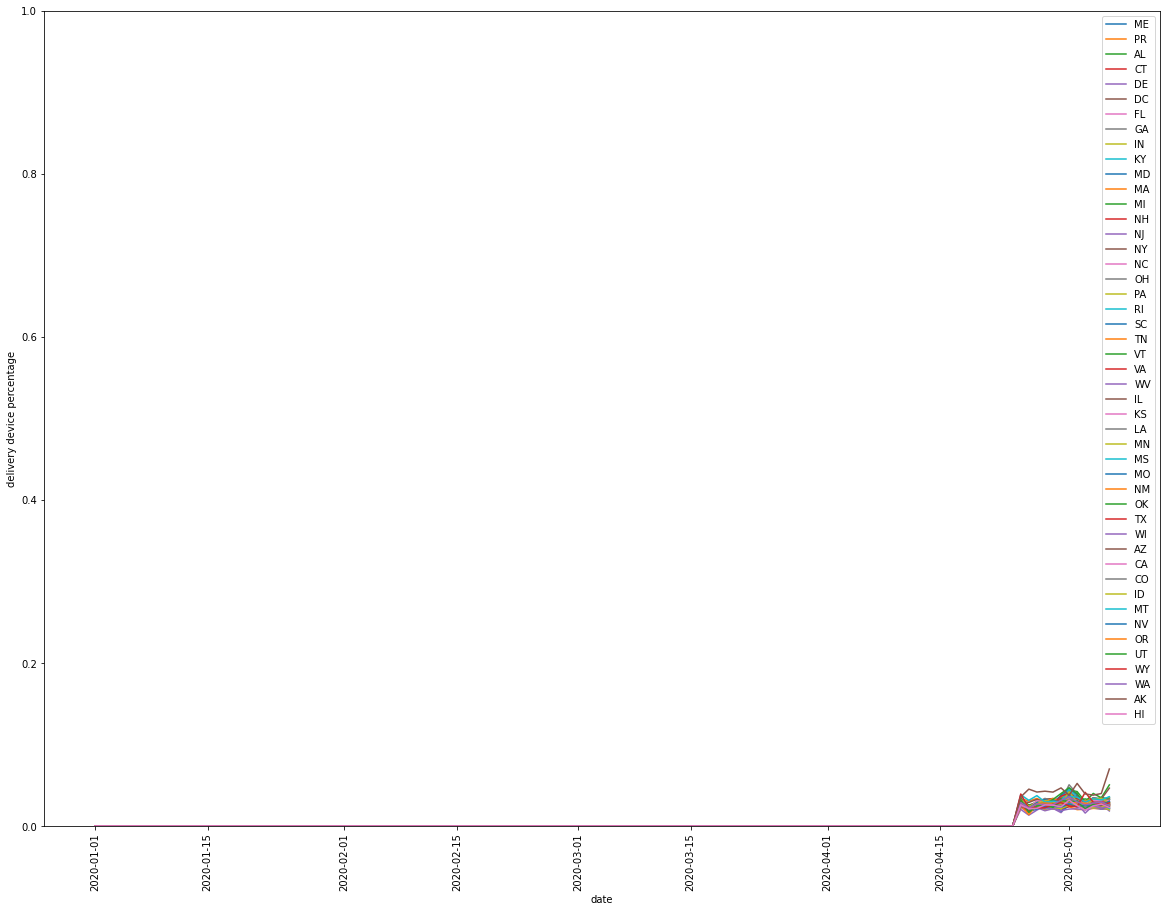

In [ ]:
plt.figure(figsize=(20, 15))
# full time percentage
for i, state in enumerate(data['state_code'].unique()):
    plt_df = data[data['state_code']==state]
    plt_df = plt_df.groupby(['start_date']).mean().reset_index()
    plt_df = plt_df.sort_values(by=['start_date'])
    plt.plot(plt_df['start_date'], plt_df['delivery_device_percentage'])
    plt.ylim(0, 1)
    plt.xticks(rotation='vertical')
    plt.legend([st]) # ?? is this adding the lengend of this state data?
    
plt.legend(data['state_code'].unique())
plt.xlabel("date")
plt.ylabel("delivery device percentage")
plt.show()


# 4. Analyze particular counties: LA, and King county

In [ ]:
data = pd.read_csv("agg_social_dist")

In [ ]:
data['home_device_percentage'] = data['completely_home_device_count'] / data['device_count']
data['part_time_work_device_percentage'] = data['part_time_work_behavior_devices'] / data['device_count']
data['full_time_work_device_percentage'] = data['full_time_work_behavior_devices'] / data['device_count']
data['delivery_device_percentage'] = data['delivery_behavior_devices'] / data['device_count']

In [ ]:
king_county_data = data[data['cnamelong'] == 'King County']

In [ ]:
king_county_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
2574,2574,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,53.0,WA,King County,53033,-21.0,-82.0,0.0,102886,35676,3505,11833,0.0,712.016368,NaN,NaN,10456.752221,0.346753,0.034067,0.115011,0.0
5191,5191,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,53.0,WA,King County,53033,-20.0,-81.0,0.0,96096,26810,7880,15694,0.0,693.532894,NaN,NaN,10464.116696,0.278992,0.082001,0.163316,0.0
7808,7808,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,53.0,WA,King County,53033,-19.0,-80.0,0.0,97956,25503,8397,15555,0.0,723.099657,NaN,NaN,9787.402262,0.260352,0.085722,0.158796,0.0
10426,10426,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,53.0,WA,King County,53033,-18.0,-79.0,0.0,96053,27864,4825,12293,0.0,782.123109,NaN,NaN,8678.837350,0.290090,0.050233,0.127981,0.0
13044,13044,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,53.0,WA,King County,53033,-17.0,-78.0,0.0,97834,34246,4696,10023,0.0,718.573482,NaN,NaN,6926.459513,0.350042,0.048000,0.102449,0.0


In [ ]:
days_from_first_case_to_shelter = king_county_data.iloc[0]['days_since_first_case'] - king_county_data.iloc[0]['days_since_shelter']

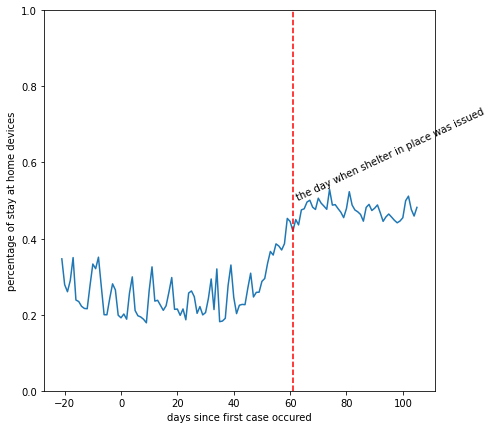

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(king_county_data['days_since_first_case'], king_county_data['home_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("percentage of stay at home devices")
plt.ylim(0,1)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)
plt.show()

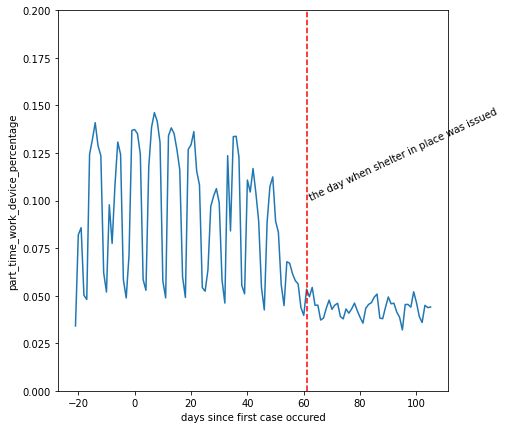

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(king_county_data['days_since_first_case'], king_county_data['part_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("part_time_work_device_percentage")
plt.ylim(0,0.2)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)
plt.show()

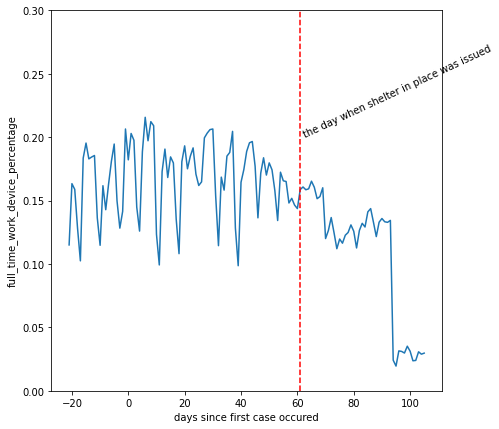

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(king_county_data['days_since_first_case'], king_county_data['full_time_work_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("full_time_work_device_percentage")
plt.ylim(0,0.3)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.2,'the day when shelter in place was issued',rotation=25)
plt.show()

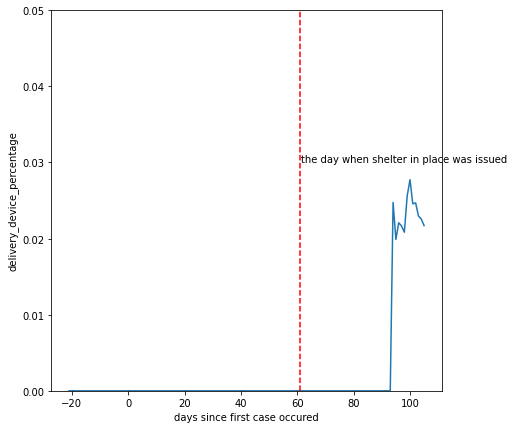

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(king_county_data['days_since_first_case'], king_county_data['delivery_device_percentage'])
plt.xlabel("days since first case occured")
plt.ylabel("delivery_device_percentage")
plt.ylim(0,0.05)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.03,'the day when shelter in place was issued')
plt.show()

In [ ]:
LA_county_data = data[(data['state_code'] == "CA") & (data['cnamelong'] == 'Los Angeles County')]

In [ ]:
LA_county_data.head()

,Unnamed: 0,date_range_start,date_range_end,state,state_code,cnamelong,county_code,days_since_first_case,days_since_shelter,candidate_device_count,device_count,completely_home_device_count,part_time_work_behavior_devices,full_time_work_behavior_devices,delivery_behavior_devices,median_home_dwell_time,median_non_home_dwell_time,median_percentage_time_home,distance_traveled_from_home,home_device_percentage,part_time_work_device_percentage,full_time_work_device_percentage,delivery_device_percentage
2464,2464,2020-01-01T00:00:00-08:00,2020-01-02T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-25.0,-78.0,0.0,402115,135643,15733,43348,0.0,705.720413,NaN,NaN,12042.490755,0.337324,0.039126,0.107800,0.0
5081,5081,2020-01-02T00:00:00-08:00,2020-01-03T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-24.0,-77.0,0.0,393125,105785,30552,56610,0.0,653.484034,NaN,NaN,9744.824781,0.269087,0.077716,0.144000,0.0
7698,7698,2020-01-03T00:00:00-08:00,2020-01-04T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-23.0,-76.0,0.0,392810,102133,33061,58467,0.0,655.288020,NaN,NaN,9470.001102,0.260006,0.084165,0.148843,0.0
10316,10316,2020-01-04T00:00:00-08:00,2020-01-05T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-22.0,-75.0,0.0,386520,108305,24110,50115,0.0,703.270061,NaN,NaN,8948.600877,0.280205,0.062377,0.129657,0.0
12934,12934,2020-01-05T00:00:00-08:00,2020-01-06T00:00:00-08:00,6.0,CA,Los Angeles County,6037,-21.0,-74.0,0.0,390481,121502,20516,39896,0.0,689.561164,NaN,NaN,7867.854933,0.311160,0.052540,0.102171,0.0


In [ ]:
days_from_first_case_to_shelter = LA_county_data.iloc[0]['days_since_first_case'] - LA_county_data.iloc[0]['days_since_shelter']

In [ ]:
days_from_first_case_to_shelter

53.0

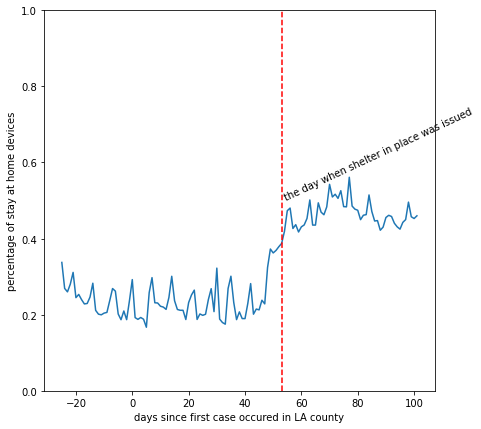

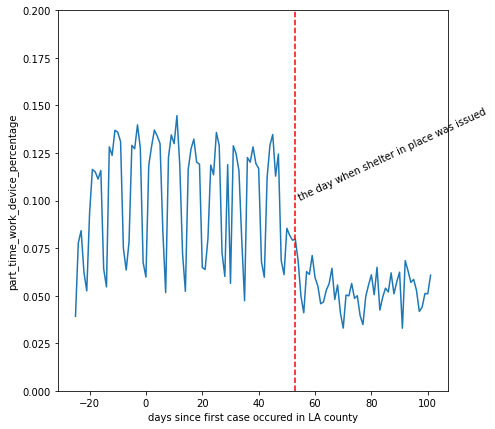

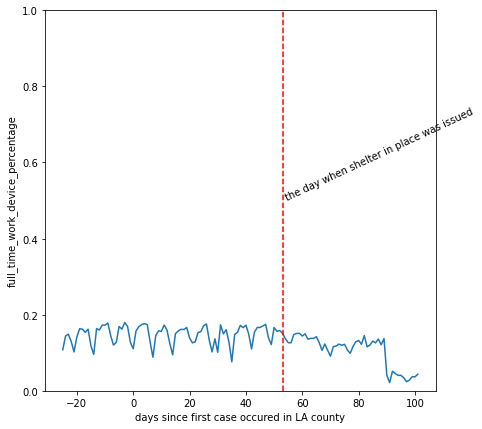

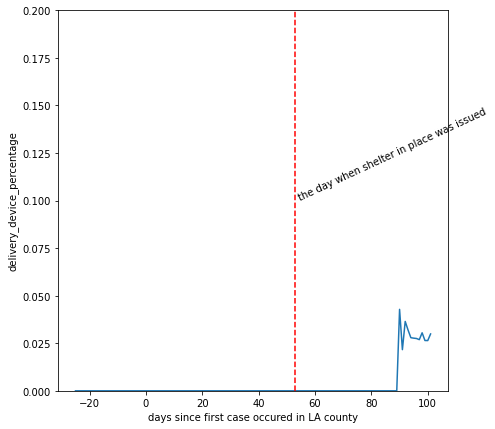

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(LA_county_data['days_since_first_case'], LA_county_data['home_device_percentage'])
plt.xlabel("days since first case occured in LA county")
plt.ylabel("percentage of stay at home devices")
plt.ylim(0,1)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(LA_county_data['days_since_first_case'], LA_county_data['part_time_work_device_percentage'])
plt.xlabel("days since first case occured in LA county")
plt.ylabel("part_time_work_device_percentage")
plt.ylim(0,0.2)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(LA_county_data['days_since_first_case'], LA_county_data['full_time_work_device_percentage'])
plt.xlabel("days since first case occured in LA county")
plt.ylabel("full_time_work_device_percentage")
plt.ylim(0,1)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.5,'the day when shelter in place was issued',rotation=25)

plt.figure(figsize=(7,7))
plt.plot(LA_county_data['days_since_first_case'], LA_county_data['delivery_device_percentage'])
plt.xlabel("days since first case occured in LA county")
plt.ylabel("delivery_device_percentage")
plt.ylim(0,0.2)
plt.axvline(days_from_first_case_to_shelter, 0, 1, linestyle = '--', color = "red")
plt.text(days_from_first_case_to_shelter + 0.5,0.1,'the day when shelter in place was issued',rotation=25)

plt.show()